# Compute NMF components of syllable use and observe syllables that go into each component

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF

In [25]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_males_raw_usage_matrix_v00.parquet')
keep_sylls = np.loadtxt('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/to_keep_syllables_raw.txt', dtype=int)
df = df[keep_sylls].astype('float32')

In [27]:
group = df.groupby('age').mean()

In [29]:
ages = group.index.get_level_values('age')

In [34]:
nmf = NMF(n_components=4, random_state=0, max_iter=2000)
scores = nmf.fit_transform(group)

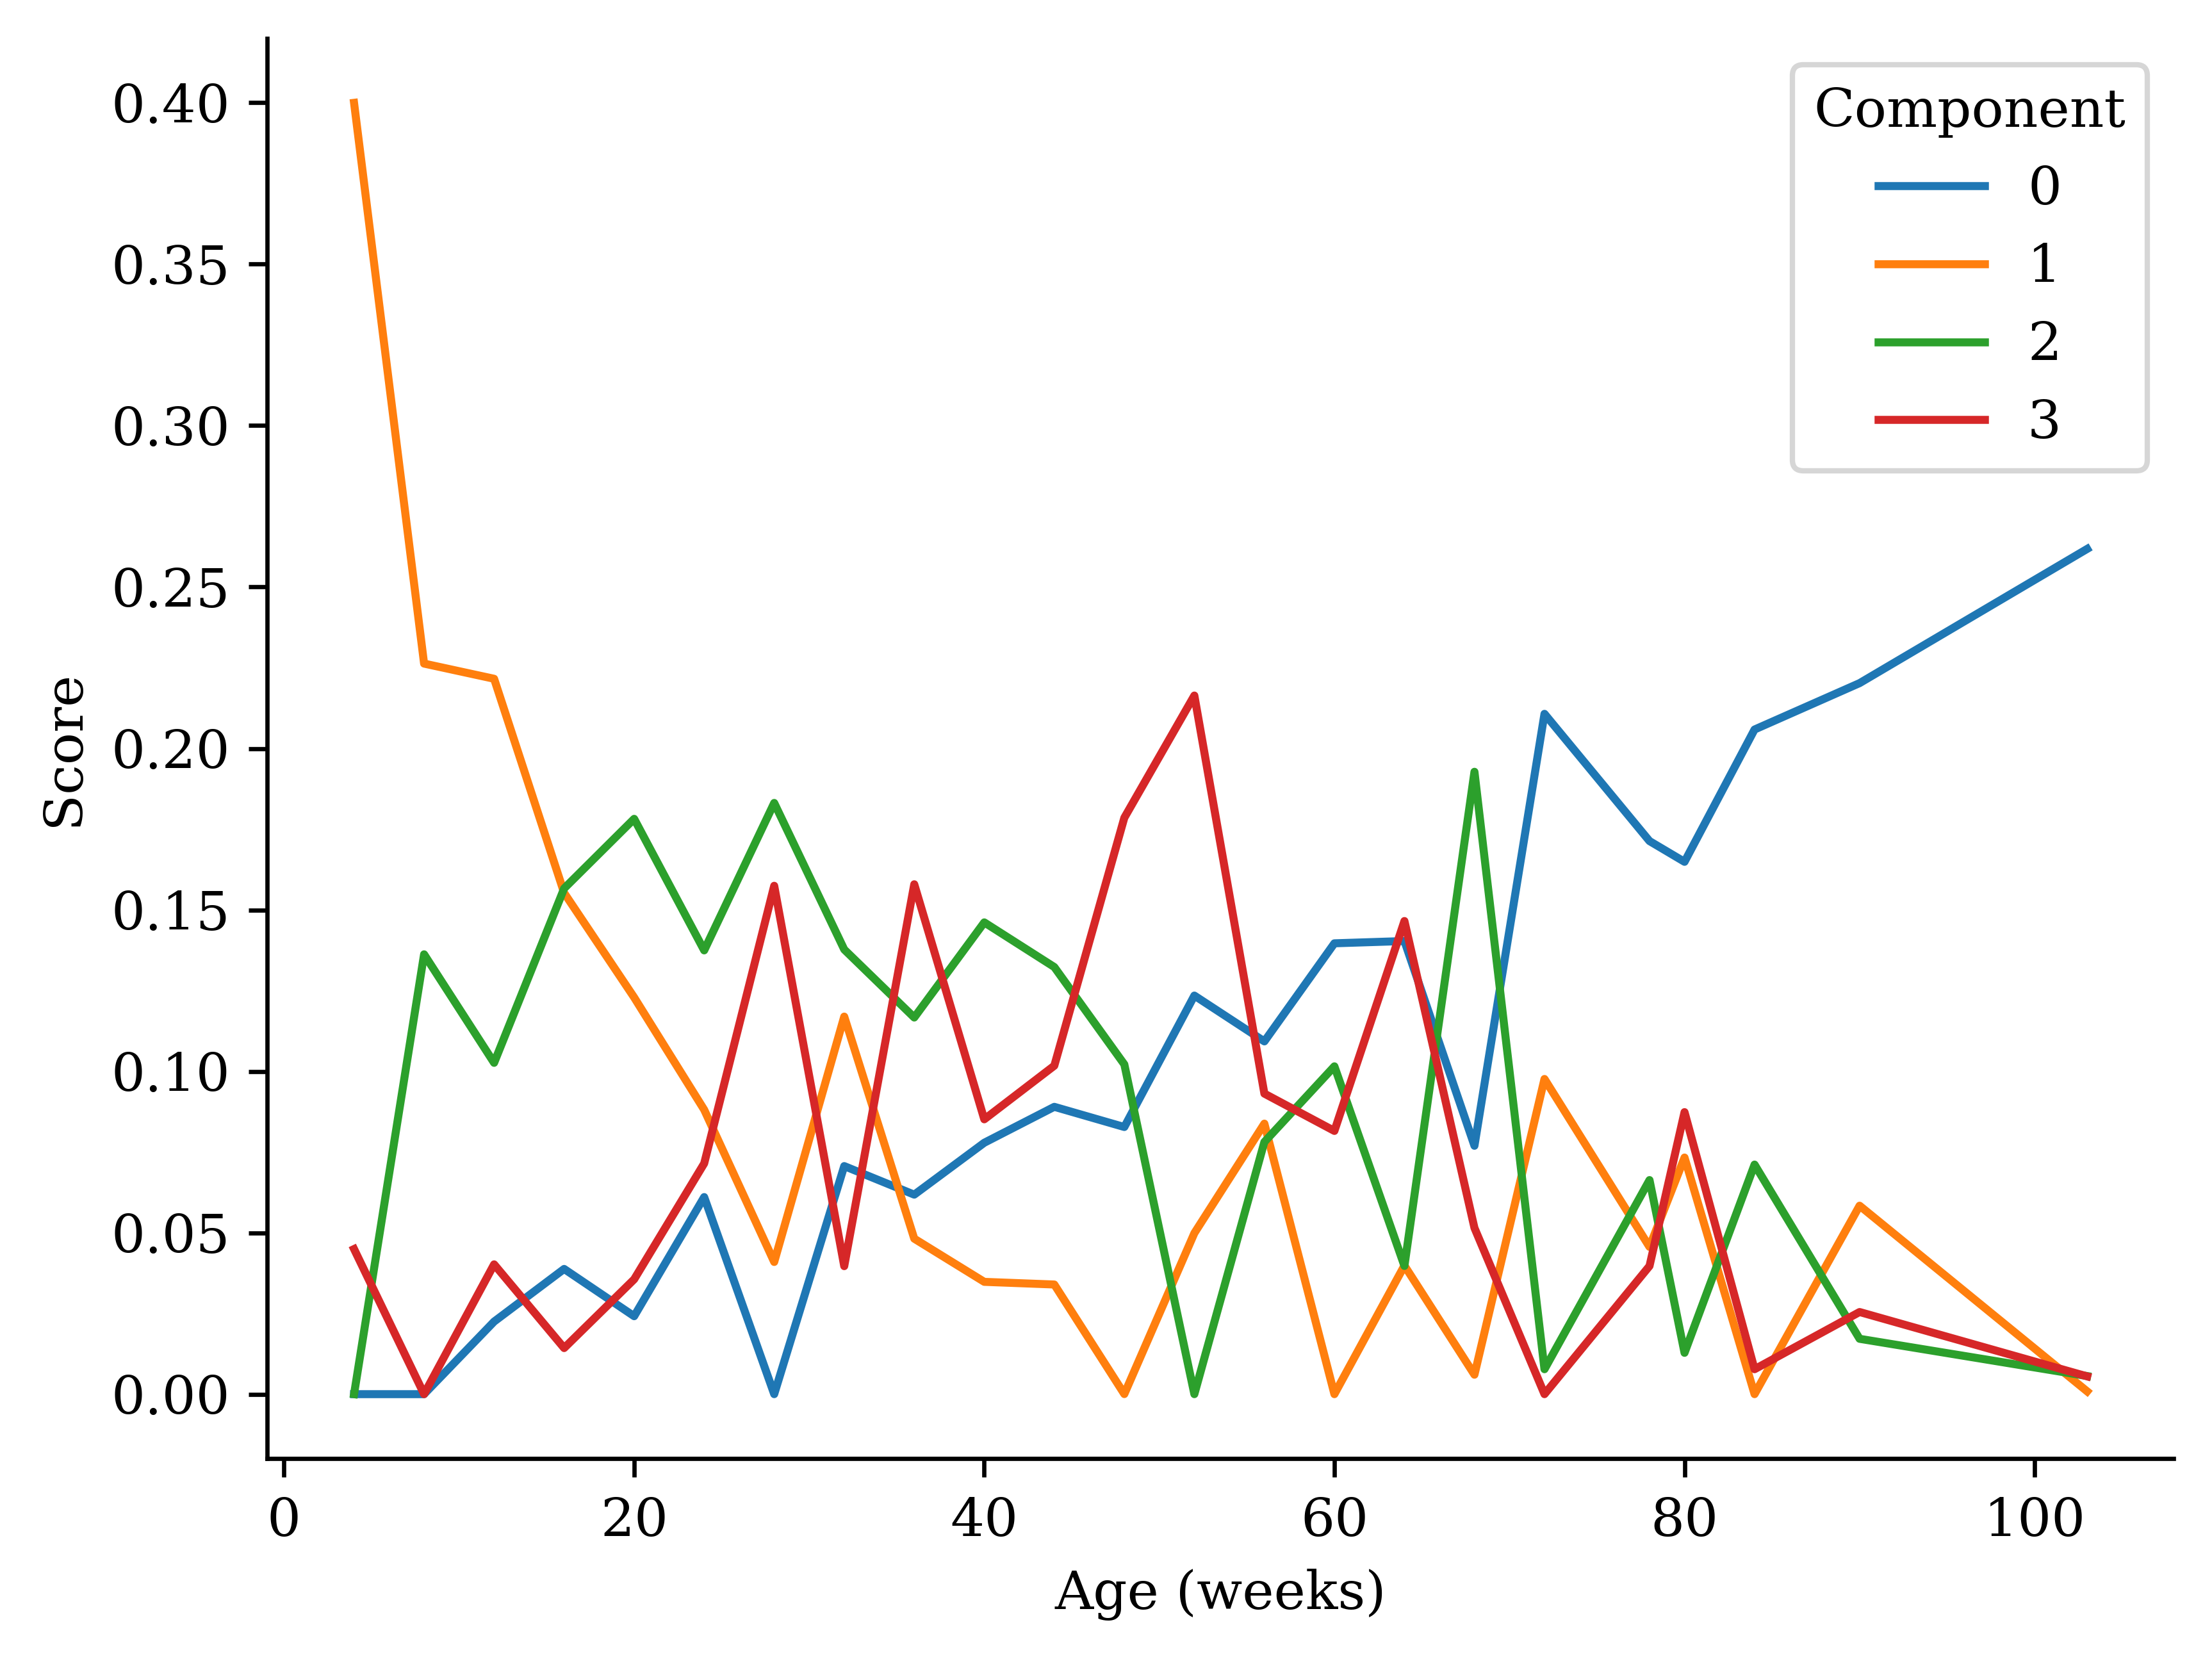

In [49]:
plt.plot(group.index, scores, label=range(4))
plt.legend(title="Component")
plt.ylabel("Score")
plt.xlabel("Age (weeks)")
sns.despine()

In [ ]:
coefs = nmf.components_

srt_idx = np.argsort(df.quantile(0.9).to_numpy())[::-1]

plt.plot(coefs[:, srt_idx].T, label=range(4))
plt.xlabel("Syllable ID")
plt.ylabel("Coefficient")
plt.legend(title="Component")
sns.despine()

In [100]:
unique_syllables = []
for i in range(4):
    c = np.zeros(4, dtype=bool)
    c[i] = 1
    diffs = (coefs[c] - np.max(coefs[~c], axis=0)).squeeze()
    unique_syllables.append(diffs)

In [101]:
for i in range(4):
    print(i, keep_sylls[np.argsort(unique_syllables[i])[::-1][:6]])

0 [ 5 74 61  7 44 50]
1 [62 42 69 11 23 53]
2 [ 2 70 71  4 13 67]
3 [59 16 24 39 10 60]


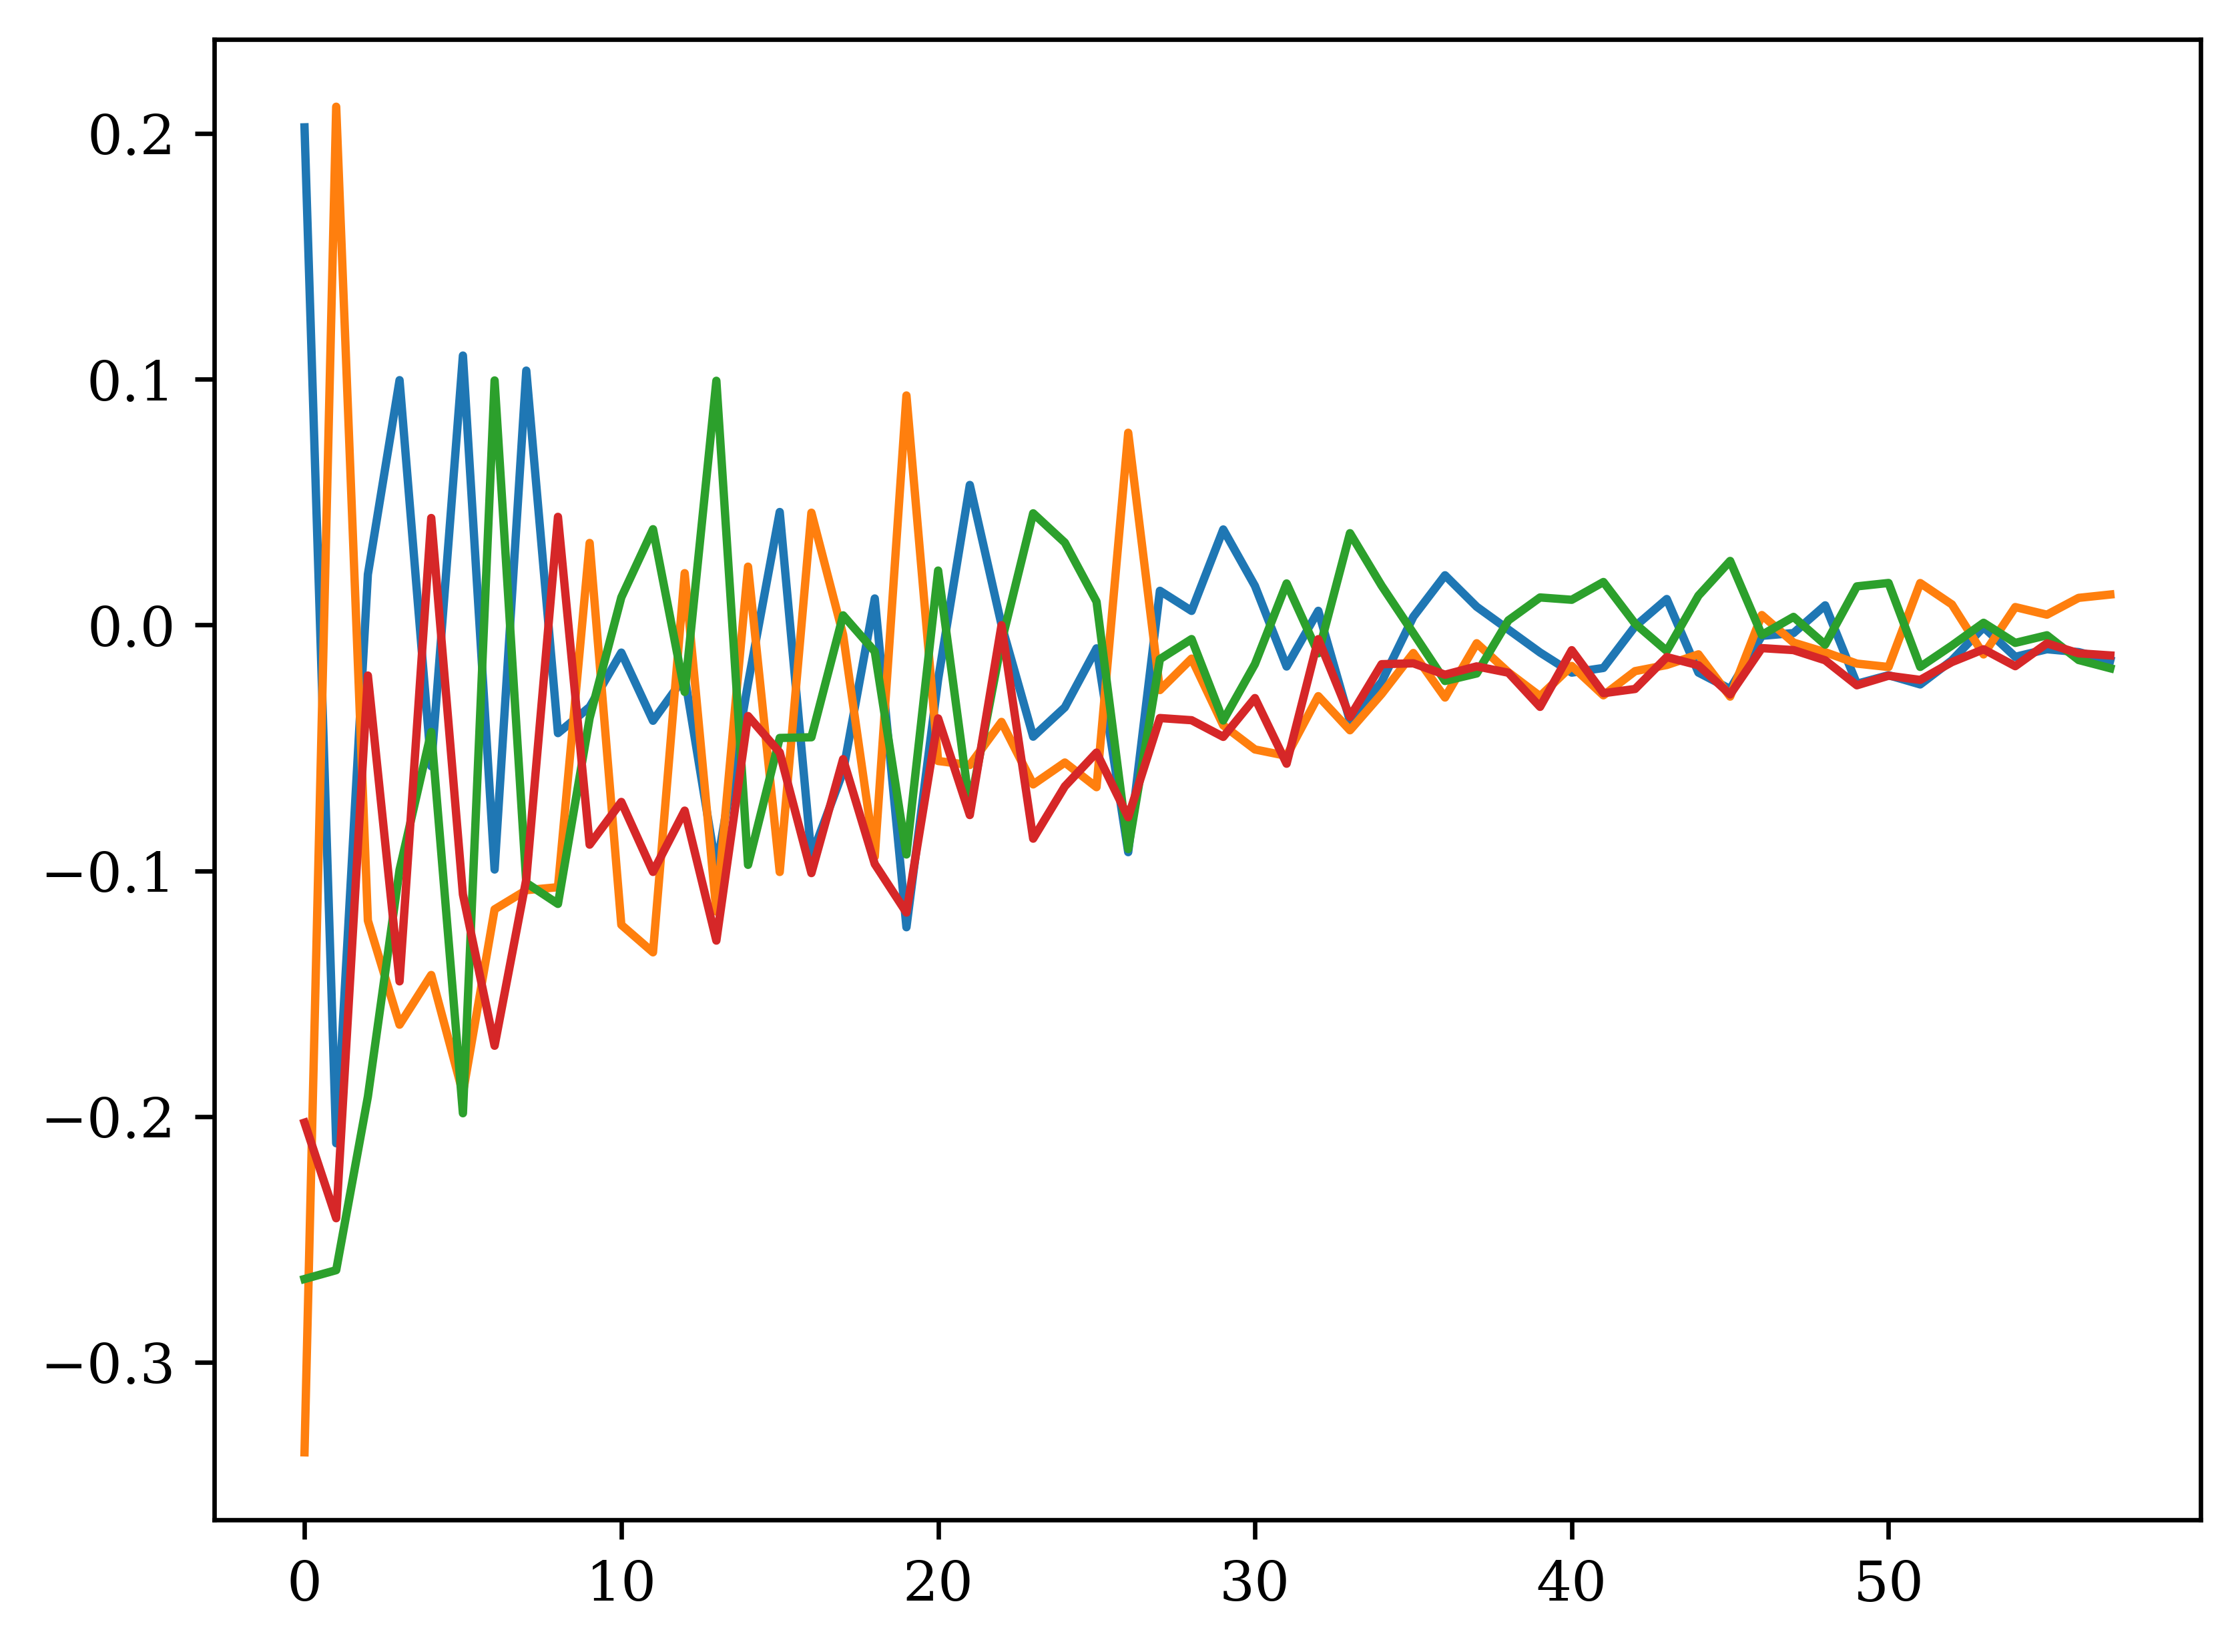

In [102]:
plt.plot(np.array(unique_syllables)[:, srt_idx].T)

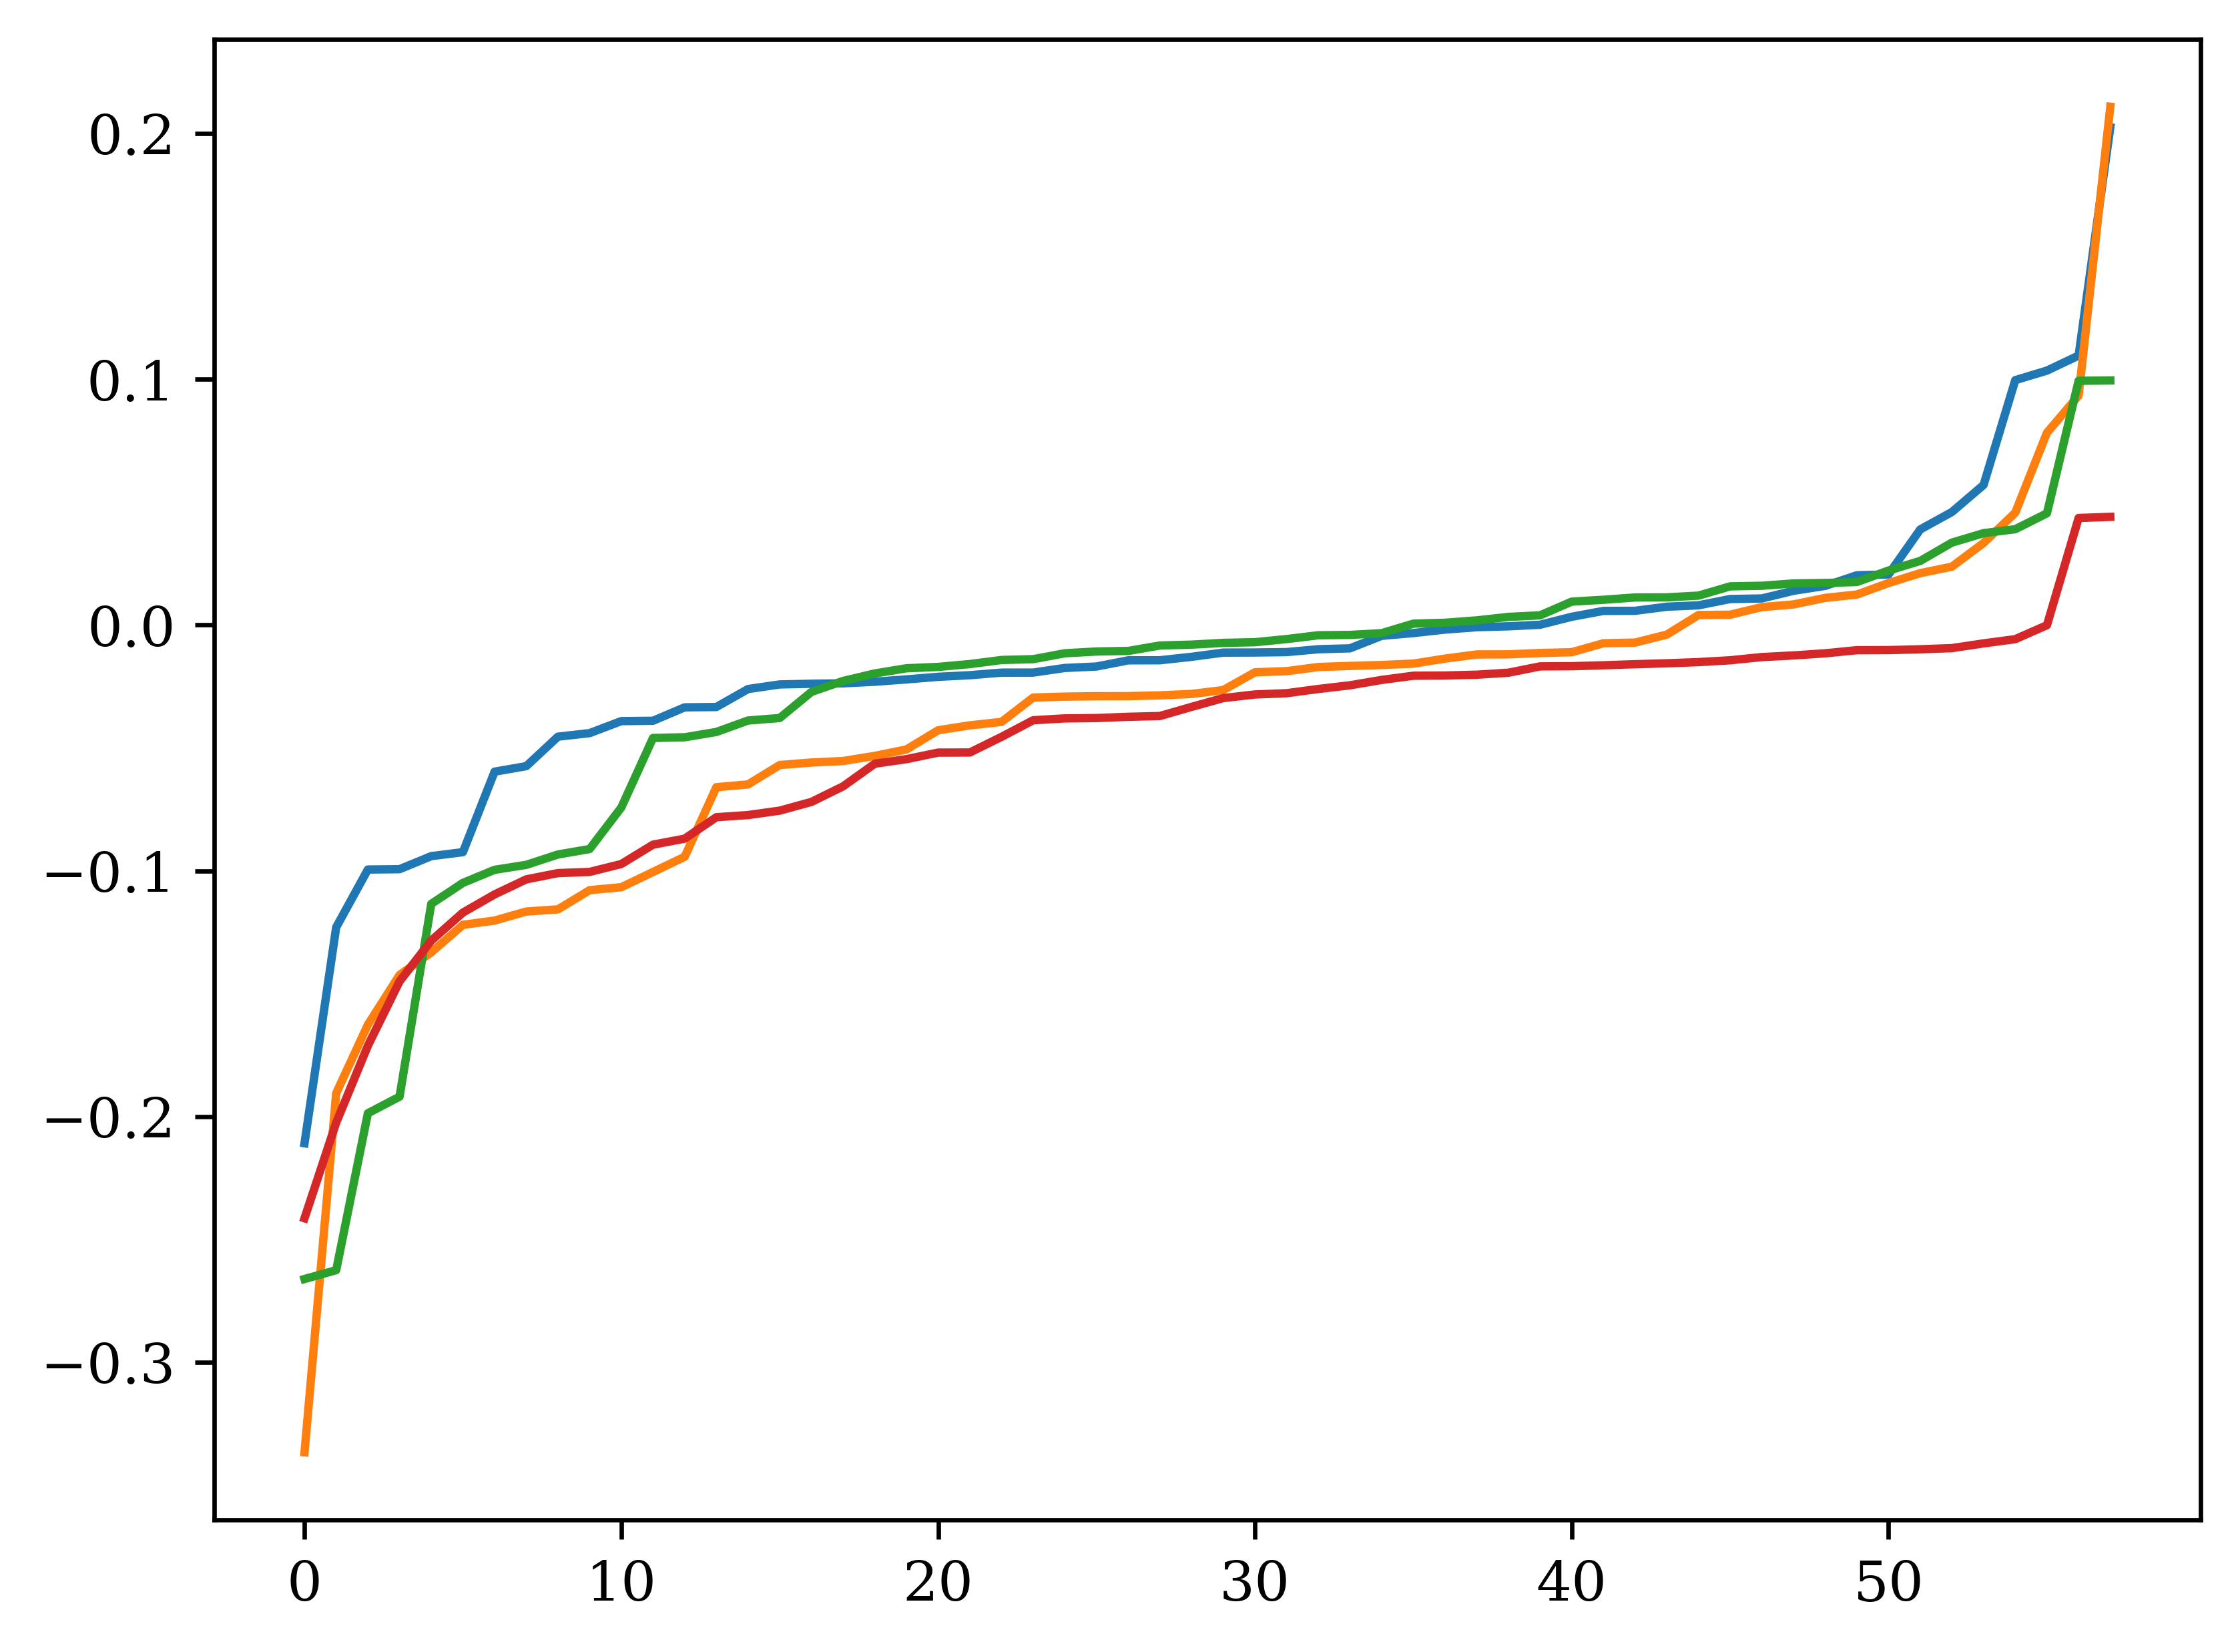

In [111]:
for i in range(4):
    plt.plot(np.sort(unique_syllables[i]))

In [103]:
argsrt = np.argsort(unique_syllables[0])[::-1]

In [104]:
unique_syllables[0][argsrt[:3]]

array([0.20250146, 0.1096346 , 0.10350912], dtype=float32)

In [105]:
argsrt[:3]

array([ 3, 46, 35])

In [106]:
keep_sylls[argsrt[:3]]

array([ 5, 74, 61])

In [107]:
argsrt = np.argsort(unique_syllables[1])[::-1]

In [108]:
argsrt[:3]

array([36, 25, 42])

In [109]:
keep_sylls[argsrt[:3]]

array([62, 42, 69])

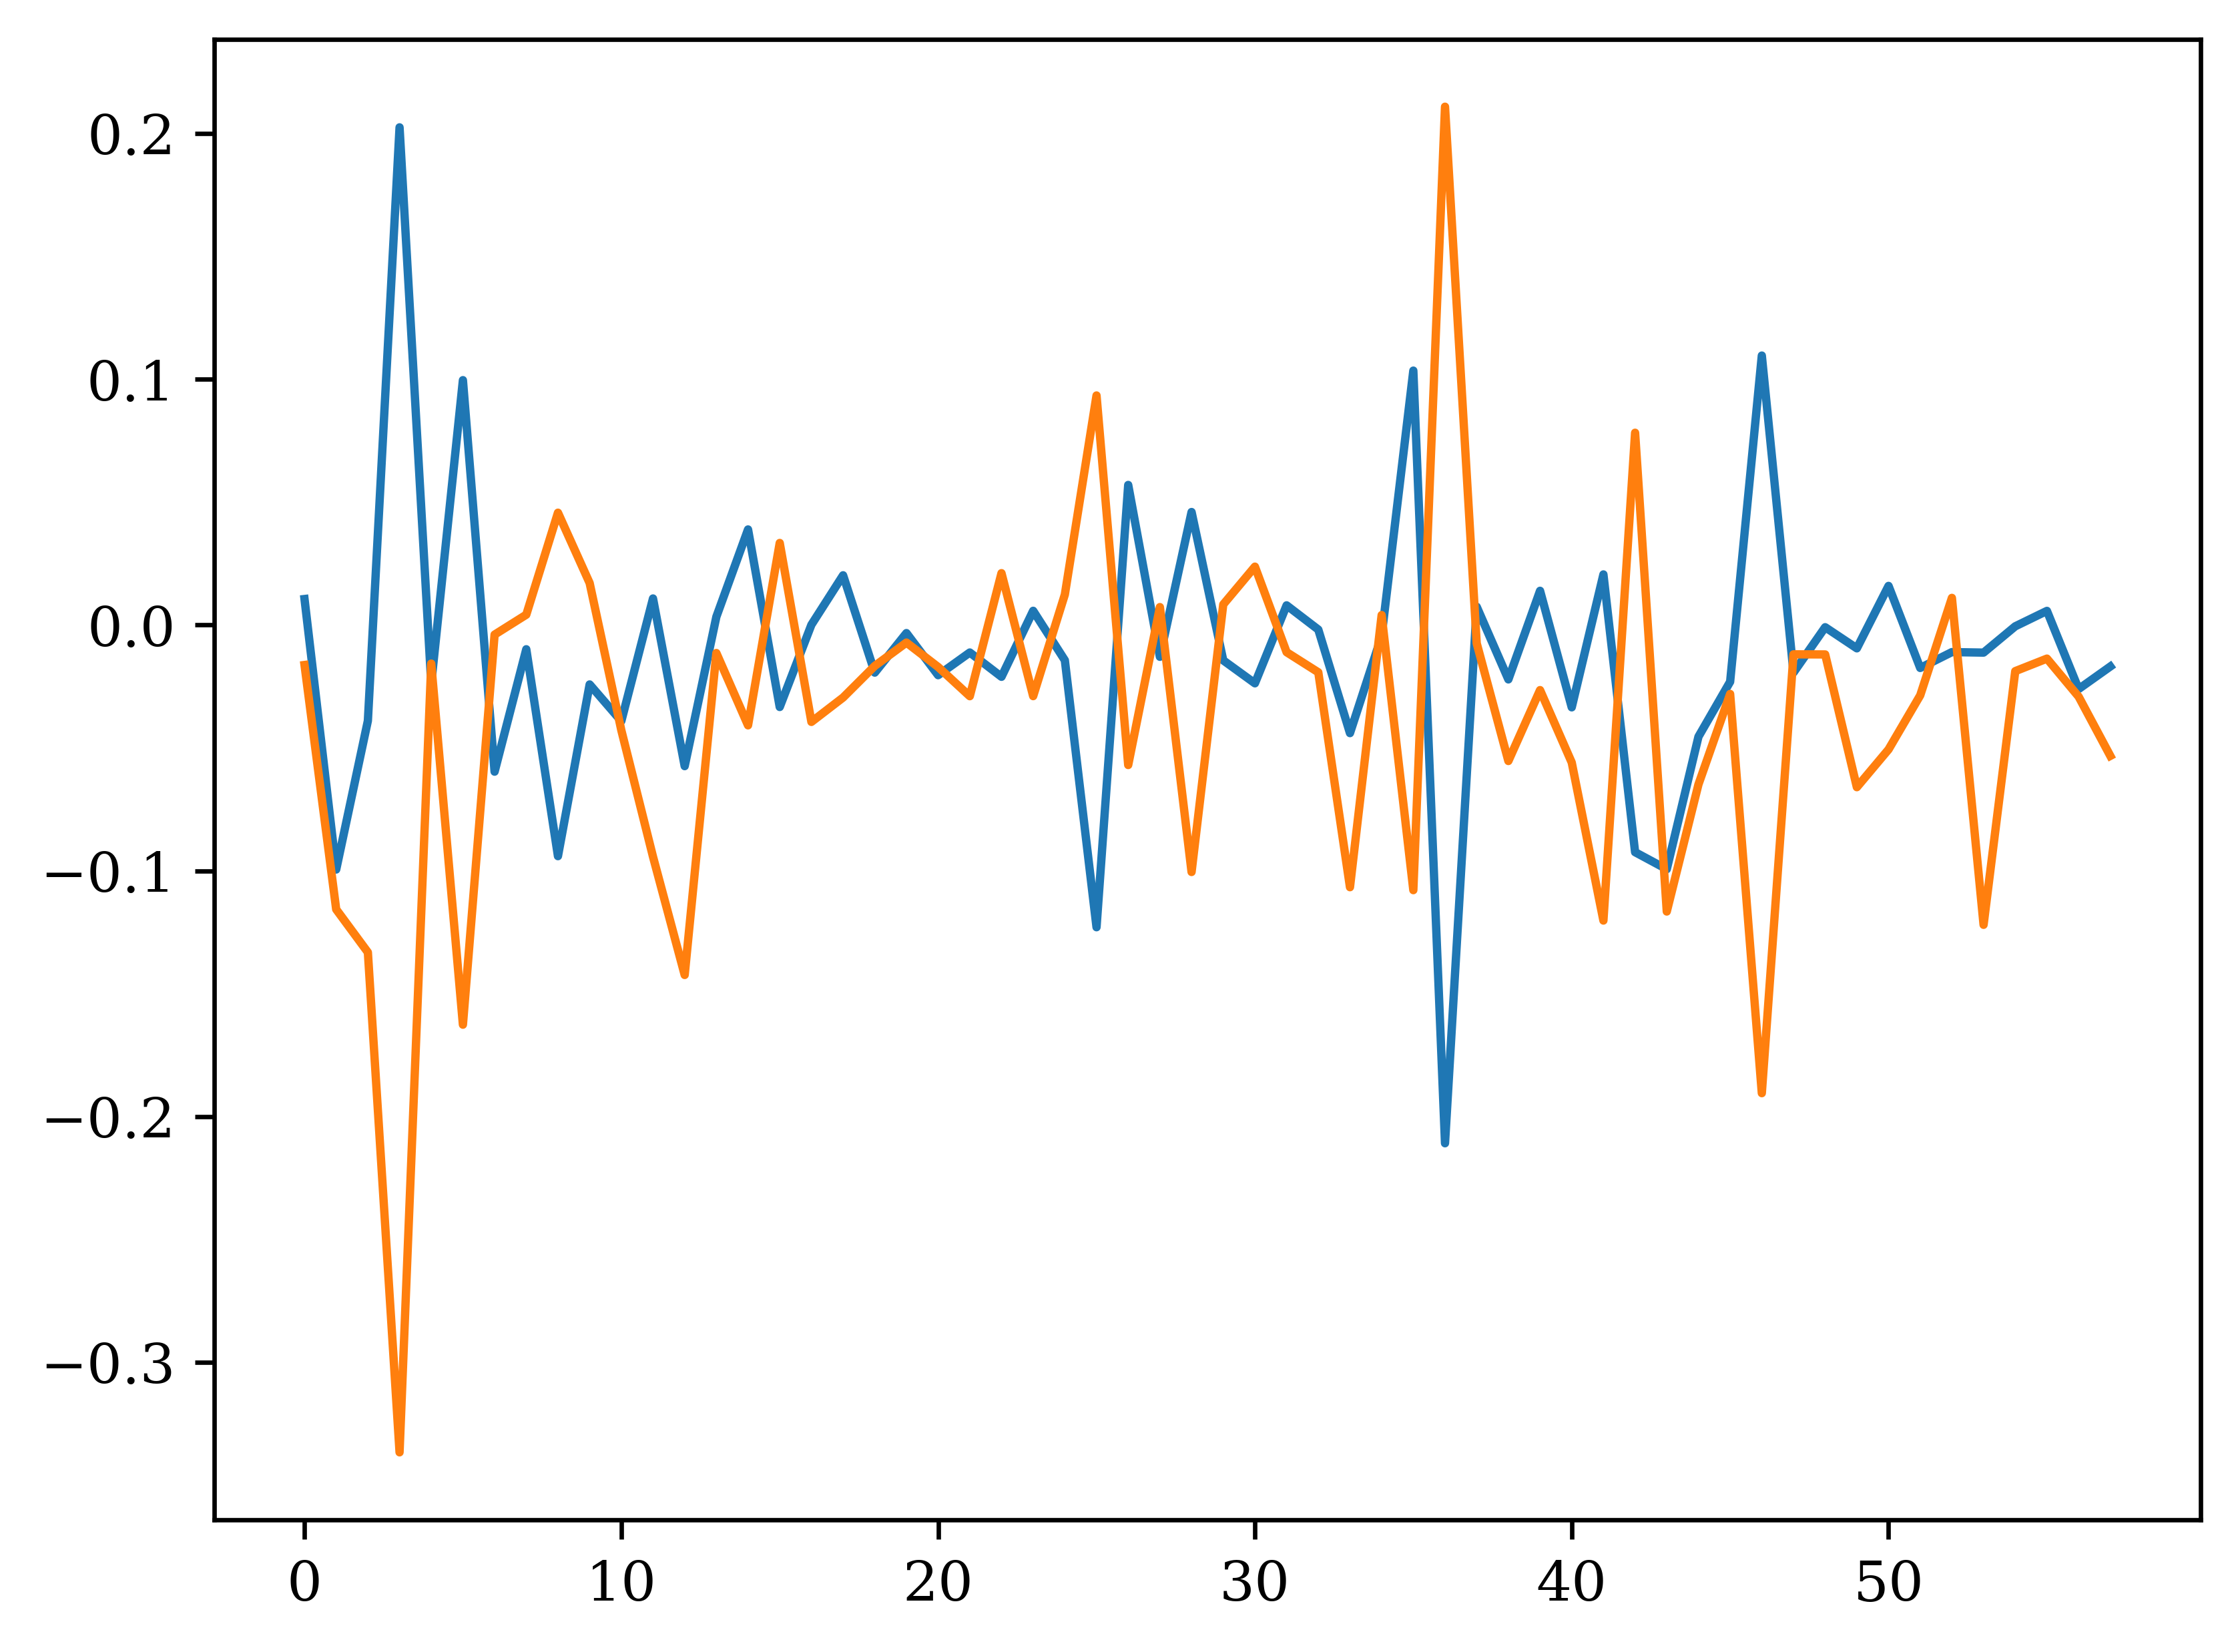

In [110]:
plt.plot(unique_syllables[0])
plt.plot(unique_syllables[1])

In [ ]:
# the syllable labels for the syllables most unique to each cluster
# isn't really popping out at me. Sure, there are some examples, but a
# lot of shared syllables